# <div style="background-color:#fff1cc; padding: 60px;"><center> Auto-ML using Pycaret 🤖</center>
 </div> 



![](https://i.pinimg.com/originals/e0/7c/81/e07c810beb24489a0d99d04a37cf7a3f.gif)


# Thanks for Visting this notebook 😊
<div class="alert alert-block alert-info" style="font-size:30px; font-family:verdana;">
    In this notebook I have used Pycaret for AutoML,apart from the analysis I have trained the model separately on both targets - EC1,EC2 and created final submission CSV.Feel free to fork or edit the notebook. If you liked the notebook, consider upvoting it. It helps other people discover them.
</div>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s3e18/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e18/test.csv')
sub = pd.read_csv('/kaggle/input/playground-series-s3e18/sample_submission.csv')

In [3]:
desc = test.describe().transpose()

In [4]:
# 'id' column is not important hence going to drop it
# test data don't have columns namely ['EC3','EC4','EC5','EC6'],so we drop these columns

for df in [train,test]:
    df.drop('id',axis=1,inplace=True)
train.drop(['EC3','EC4','EC5','EC6'],axis=1,inplace=True)

In [5]:
train.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,...,0.000000,0.000000,17.744066,0.000000,4.794537,35.527357,0,0,1,1
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,...,0.000000,0.000000,7.822697,30.705892,13.825658,44.707310,0,0,0,1
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,...,53.378235,0.000000,15.645394,73.143616,17.964475,45.660120,0,0,1,1
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,...,0.000000,6.420822,15.645394,62.107304,31.961948,87.509997,0,0,1,1
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,...,19.386400,0.000000,11.938611,18.883484,9.589074,33.333333,2,2,1,0


![](https://setscholars.net/wp-content/uploads/2021/11/PyCaret.png)
# **Using Pycaret**

In [6]:
!python -m pip install pycaret
!pip install -q --pre pycaret --no-index --find-links=file:////kaggle/input/pycaret-and-autoviz-pip-wheels/pycaret-3.10
!pip install -q autoviz --no-index --find-links=file:////kaggle/input/pycaret-and-autoviz-pip-wheels/autoviz-3.10

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 

In [7]:
from pycaret.classification import *

In [8]:
#Importing again for eliminating EC2
train = pd.read_csv('/kaggle/input/playground-series-s3e18/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e18/test.csv')
sub = pd.read_csv('/kaggle/input/playground-series-s3e18/sample_submission.csv')

for df in [train,test]:
    df.drop('id',axis=1,inplace=True)
train.drop(['EC3','EC4','EC5','EC6'],axis=1,inplace=True)

#  **Target = EC1** 

In [9]:
from sklearn.model_selection import train_test_split
train = train.drop(['EC2'], axis=1)
train_data, test_data = train_test_split(train, test_size=0.2, random_state=42)



**TRAINING ON COMPLETE DATA-  ' TRAIN '**

In [10]:
model_EC1 = setup(data = train, target = 'EC1', session_id=123,normalize = True, normalize_method = 'minmax')
best_auc_models = compare_models(sort='AUC',n_select = 3)
holdout_pred = predict_model(best_auc_models[0])
#predicting on test dataset
predictions = predict_model(best_auc_models[0], data = test)



,Description,Value
0,Session id,123
1,Target,EC1
2,Target type,Binary
3,Original data shape,"(14838, 32)"
4,Transformed data shape,"(14838, 32)"
5,Transformed train set shape,"(10386, 32)"
6,Transformed test set shape,"(4452, 32)"
7,Numeric features,31
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7050,0.7054,0.8673,0.7372,0.7970,0.2702,0.2828,2.1380
catboost,CatBoost Classifier,0.7010,0.7039,0.8701,0.7325,0.7953,0.2555,0.2692,9.1000
lightgbm,Light Gradient Boosting Machine,0.7049,0.6971,0.8714,0.7356,0.7977,0.2664,0.2801,0.9940
rf,Random Forest Classifier,0.7009,0.6956,0.8696,0.7326,0.7952,0.2558,0.2695,1.5430
ada,Ada Boost Classifier,0.6988,0.6933,0.8493,0.7388,0.7902,0.2656,0.2740,0.5920
et,Extra Trees Classifier,0.6974,0.6927,0.8659,0.7307,0.7926,0.2477,0.2605,0.9180
xgboost,Extreme Gradient Boosting,0.6864,0.6765,0.8371,0.7319,0.7809,0.2379,0.2449,1.4320
nb,Naive Bayes,0.6550,0.6734,0.6828,0.7742,0.7253,0.2661,0.2702,0.0660
lr,Logistic Regression,0.6912,0.6721,0.9044,0.7115,0.7964,0.1936,0.2197,0.5530
lda,Linear Discriminant Analysis,0.6949,0.6720,0.8936,0.7183,0.7964,0.2157,0.2376,0.1030


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7031,0.6945,0.8671,0.7355,0.7959,0.2642,0.2766


In [11]:
# list of top 3 models by AUC
best_auc_models

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=123, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lamb

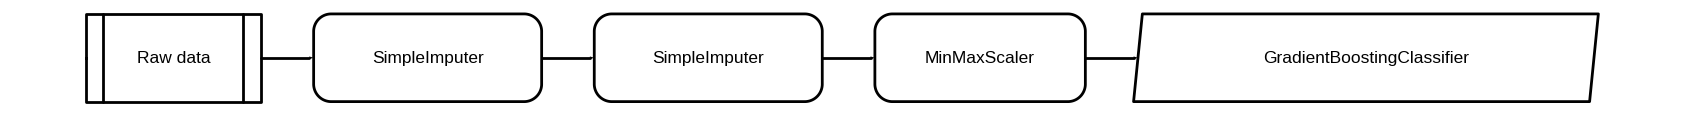




_________________________________________   auc   ___________________________________________


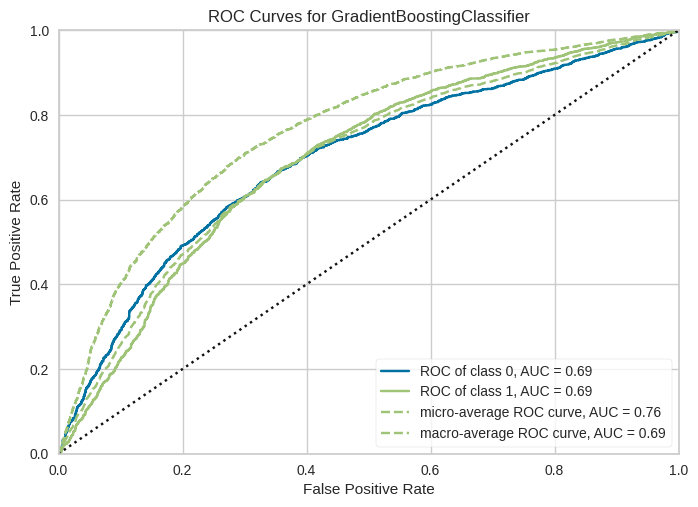




_________________________________________   pr   ___________________________________________


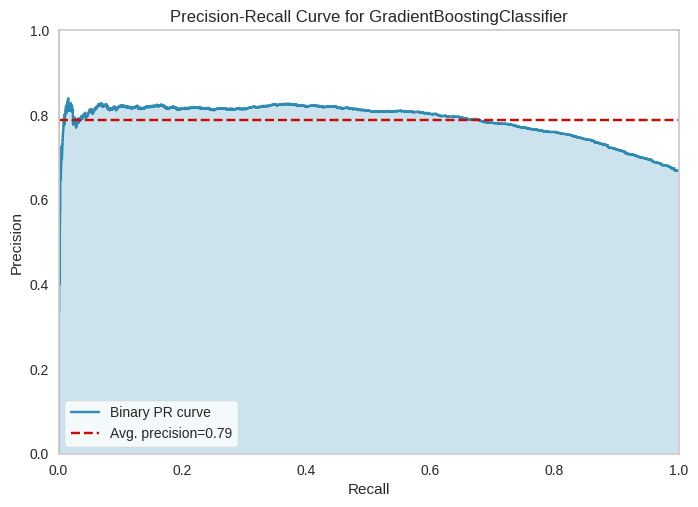




_________________________________________   confusion_matrix   ___________________________________________


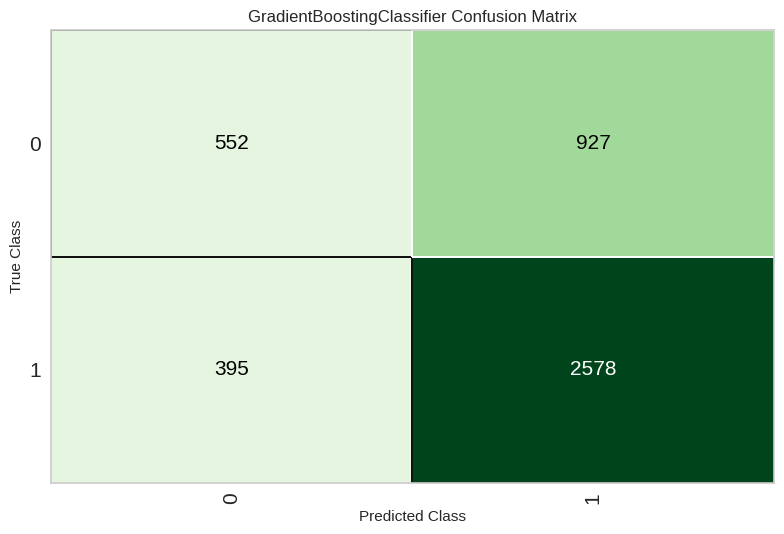




_________________________________________   error   ___________________________________________


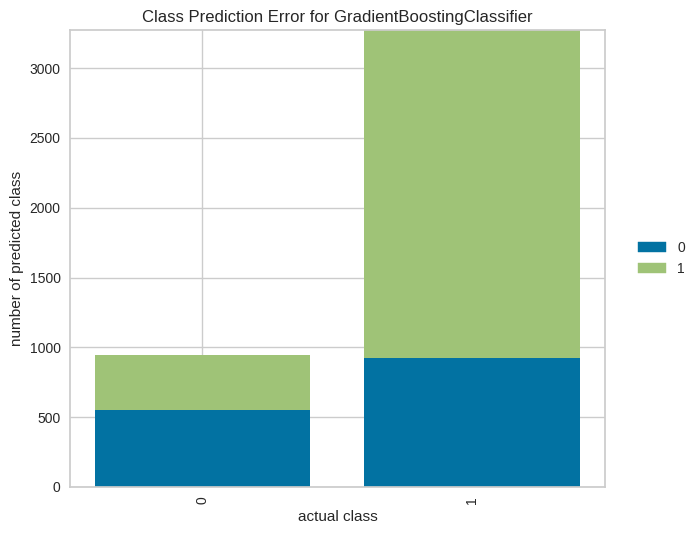




_________________________________________   class_report   ___________________________________________


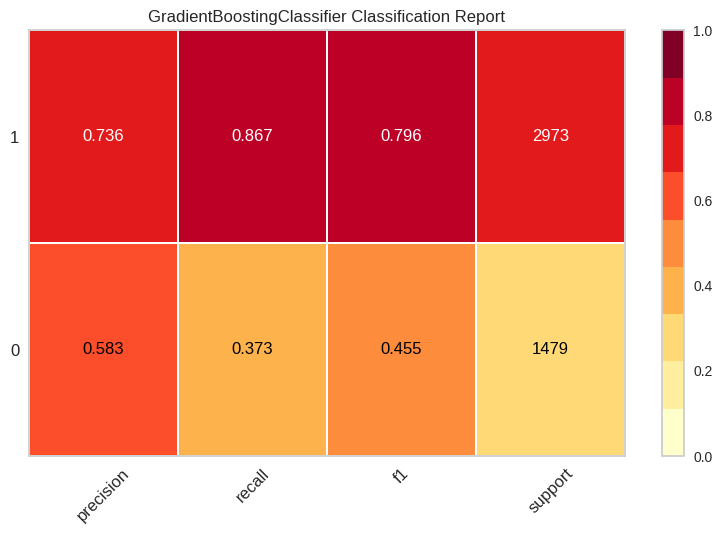




_________________________________________   calibration   ___________________________________________


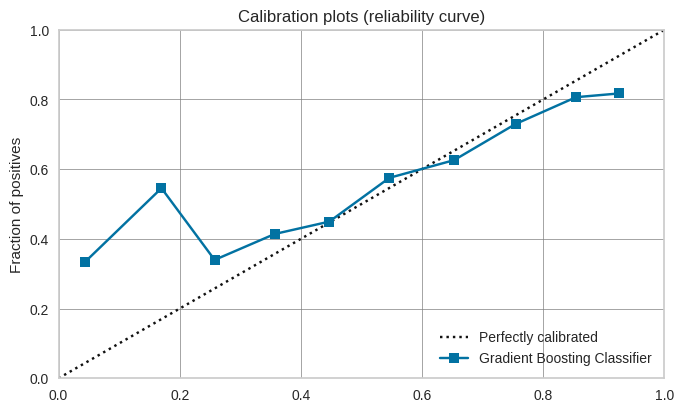




_________________________________________   feature   ___________________________________________


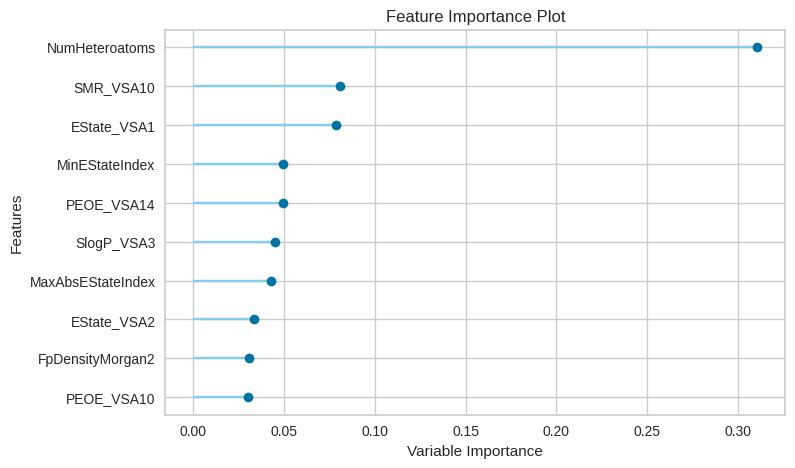




_________________________________________   parameter   ___________________________________________


,Parameters
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,log_loss
max_depth,3
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1





_________________________________________   lift   ___________________________________________


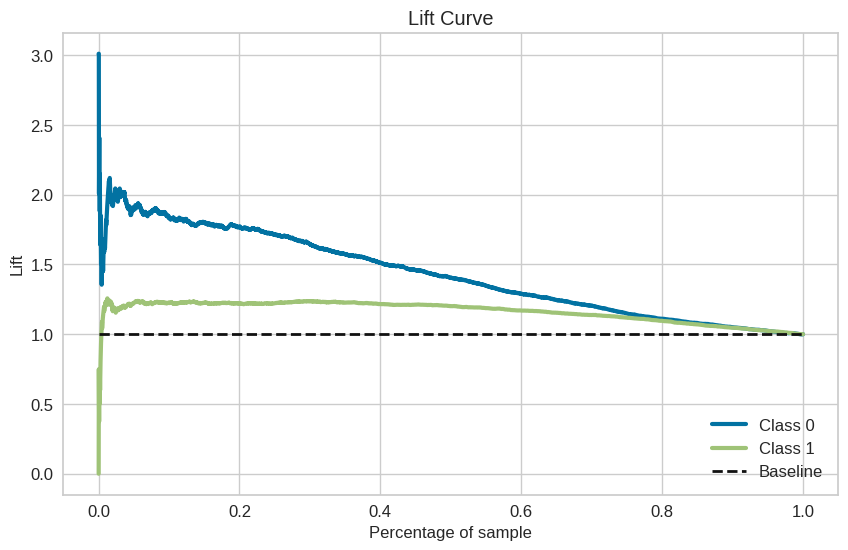




_________________________________________   gain   ___________________________________________


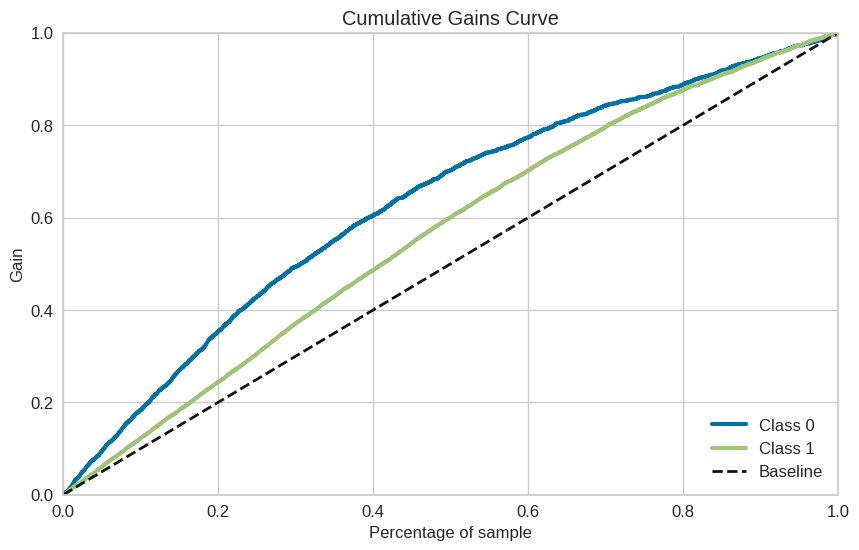

In [12]:
'''     

        Available plots in pycaret
        
        * 'pipeline' - Schematic drawing of the preprocessing pipeline
        * 'auc' - Area Under the Curve
        * 'threshold' - Discrimination Threshold
        * 'pr' - Precision Recall Curve
        * 'confusion_matrix' - Confusion Matrix
        * 'error' - Class Prediction Error
        * 'class_report' - Classification Report
        * 'boundary' - Decision Boundary
        * 'rfe' - Recursive Feature Selection
        * 'learning' - Learning Curve
        * 'manifold' - Manifold Learning
        * 'calibration' - Calibration Curve
        * 'vc' - Validation Curve
        * 'dimension' - Dimension Learning
        * 'feature' - Feature Importance
        * 'feature_all' - Feature Importance (All)
        * 'parameter' - Model Hyperparameter
        * 'lift' - Lift Curve
        * 'gain' - Gain Chart
        * 'tree' - Decision Tree
        * 'ks' - KS Statistic Plot
        
'''

available_plots = ['pipeline','auc','pr','confusion_matrix','error','class_report','calibration','feature','parameter','lift','gain']
    
for i in available_plots:
    print('_________________________________________  ',i,'  ___________________________________________',sep=' ')
    plot_model(best_auc_models[0],plot=i)
    print('\n\n')


In [13]:
# blend top 3 models
#uncomment below to blend 

blender = blend_models(best_auc_models)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6949,0.7059,0.8557,0.7321,0.7891,0.2497,0.2598
1,0.6987,0.7078,0.8732,0.7292,0.7948,0.2455,0.2601
2,0.7074,0.7054,0.8919,0.7300,0.8029,0.2570,0.2774
3,0.7016,0.6917,0.8674,0.7341,0.7952,0.2594,0.2720
4,0.7113,0.7192,0.8732,0.7408,0.8016,0.2844,0.2977
5,0.7093,0.7214,0.8790,0.7367,0.8016,0.2738,0.2892
6,0.7023,0.6896,0.8557,0.7394,0.7933,0.2714,0.2809
7,0.7177,0.7279,0.8932,0.7387,0.8086,0.2889,0.3087
8,0.7081,0.7057,0.8716,0.7384,0.7995,0.2764,0.2896


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [14]:
blender

VotingClassifier(estimators=[('Gradient Boosting Classifier',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='log_loss',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=100,
                                                         n_iter_no_change=Non...
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=123, reg_alpha=0.0,
                                             reg_lambda=0.0, silent='warn',
                                             subsample=1.0,
                                             subsample_for_bin=200000,
                                             subsample_freq=0))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

In [15]:
holdout_pred = predict_model(blender)
#predicting on test dataset
predictions = predict_model(blender, data = test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7017,0.6981,0.8695,0.7333,0.7956,0.2581,0.2714


In [16]:
#help(blend_models)

In [17]:
predictions.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,prediction_label,prediction_score
0,344.632385,7.283604,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458580,0.000000,...,0.00000,0.000000,26.809273,24.539801,4.794537,47.304081,1,1,0,0.5057
1,1432.410156,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,29.783175,...,98.32399,9.606882,0.000000,53.378235,0.000000,43.166668,0,0,1,0.8848
2,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969306,6.420822,...,0.00000,6.420822,11.752550,13.344559,9.589074,24.666666,1,1,1,0.7285
3,150.255707,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,0.000000,...,0.00000,0.000000,17.744066,32.290169,4.794537,26.778866,0,0,1,0.7802
4,1817.276367,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554970,47.360207,...,0.00000,37.098999,69.141350,38.704128,50.697491,102.583336,0,0,1,0.8012


**Adding EC1 column to our CSV file**

In [18]:
submission = sub
submission['EC1'] = predictions['prediction_label']

In [19]:
submission.head()

,id,EC1,EC2
0,14838,0,0.5
1,14839,1,0.5
2,14840,1,0.5
3,14841,1,0.5
4,14842,1,0.5


# * **Target = EC2**

In [20]:
#Importing again for eliminating EC2
train = pd.read_csv('/kaggle/input/playground-series-s3e18/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e18/test.csv')


for df in [train,test]:
    df.drop('id',axis=1,inplace=True)
train.drop(['EC3','EC4','EC5','EC6'],axis=1,inplace=True)


#NOW DROP EC1
from sklearn.model_selection import train_test_split
train = train.drop(['EC1'], axis=1)


**Training on complete data**

In [21]:
model_EC1 = setup(data = train, target = 'EC2', session_id=123, normalize = True, normalize_method = 'minmax')
best_auc_models = compare_models(sort='AUC',n_select = 3)


,Description,Value
0,Session id,123
1,Target,EC2
2,Target type,Binary
3,Original data shape,"(14838, 32)"
4,Transformed data shape,"(14838, 32)"
5,Transformed train set shape,"(10386, 32)"
6,Transformed test set shape,"(4452, 32)"
7,Numeric features,31
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7982,0.5815,0.9975,0.7996,0.8876,0.0058,0.0245,5.5390
ada,Ada Boost Classifier,0.7983,0.5778,0.9973,0.7997,0.8876,0.0071,0.0267,1.4920
lr,Logistic Regression,0.7990,0.5743,0.9998,0.7991,0.8882,0.0011,0.0079,0.8880
lda,Linear Discriminant Analysis,0.7981,0.5726,0.9987,0.7989,0.8877,-0.0006,-0.0045,0.5010
catboost,CatBoost Classifier,0.7989,0.5683,0.9984,0.7996,0.8880,0.0066,0.0303,7.7290
lightgbm,Light Gradient Boosting Machine,0.7950,0.5589,0.9922,0.7996,0.8855,0.0057,0.0152,1.1130
rf,Random Forest Classifier,0.7968,0.5580,0.9949,0.7997,0.8867,0.0070,0.0178,4.6290
et,Extra Trees Classifier,0.7956,0.5549,0.9917,0.8003,0.8857,0.0123,0.0301,2.3460
qda,Quadratic Discriminant Analysis,0.3330,0.5525,0.2118,0.8224,0.3114,0.0142,0.0283,0.4590
nb,Naive Bayes,0.2835,0.5445,0.1307,0.8530,0.1702,0.0120,0.0357,0.1320


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [22]:
# list of top 3 models by AUC
best_auc_models

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=123, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                    estimator=None, learning_rate=1.0, n_estimators=50,
                    random_state=123),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto'

In [23]:
# blend top 3 models
# help(blend_models)
#uncomment below to blend 

#blend_models(best_auc_models)

In [24]:
# stack models
# model_blend = blend_models(best_auc_models)

In [25]:
# model_blend

In [26]:
holdout_pred = predict_model(best_auc_models[0])
predictions = predict_model(best_auc_models[0], data = test)

# holdout_pred = predict_model(model_blend)
# predictions = predict_model(model_blend, data = test)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7972,0.5761,0.9978,0.7986,0.8871,-0.0036,-0.0213


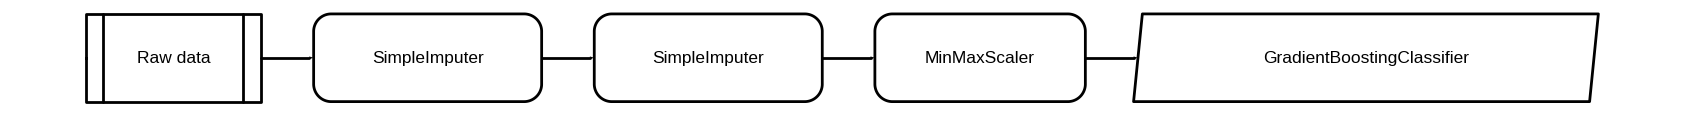




_________________________________________   auc   ___________________________________________


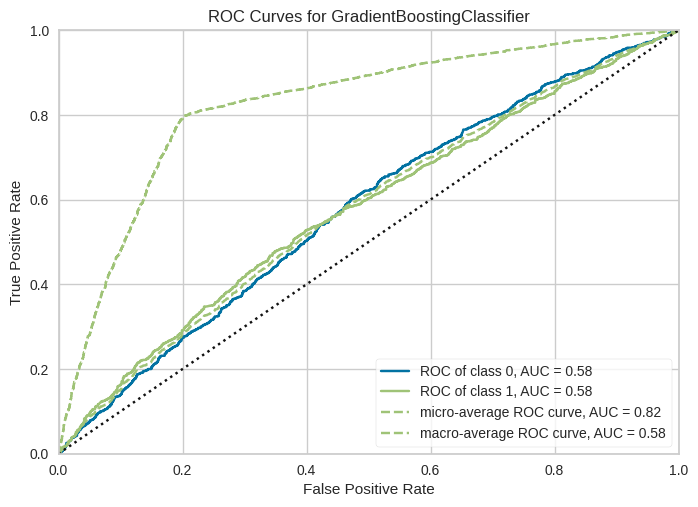




_________________________________________   pr   ___________________________________________


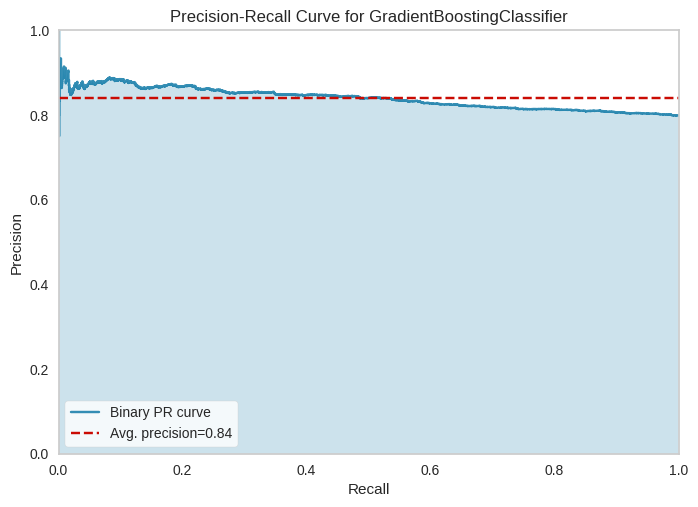




_________________________________________   confusion_matrix   ___________________________________________


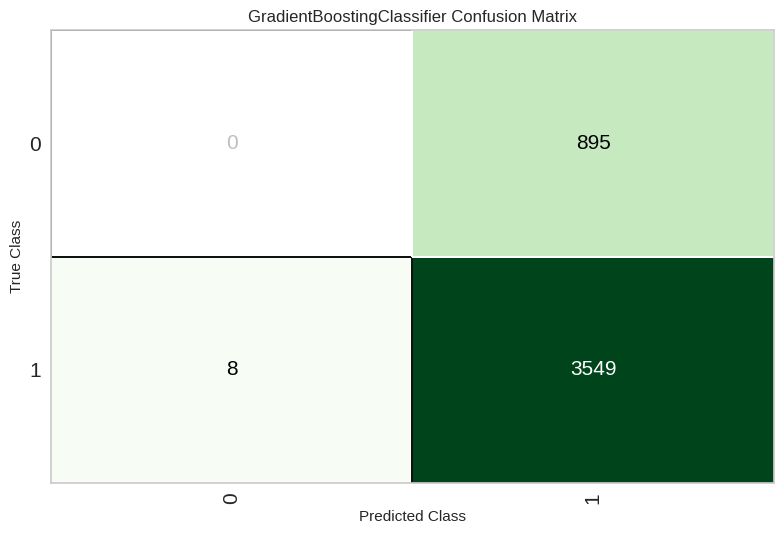




_________________________________________   error   ___________________________________________


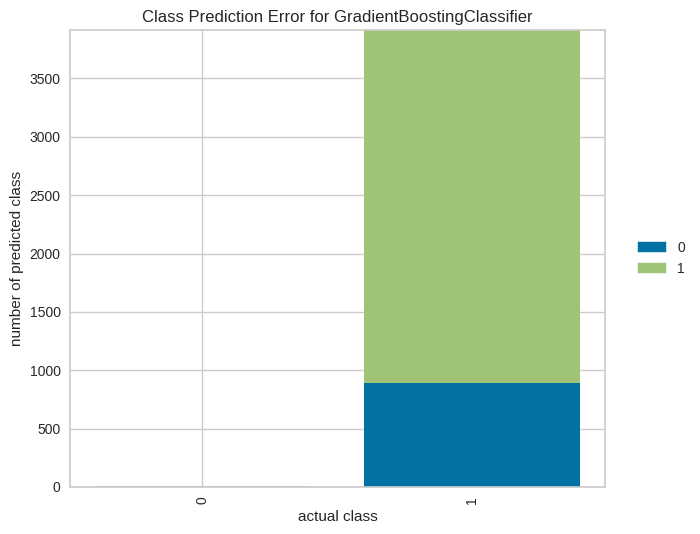




_________________________________________   class_report   ___________________________________________


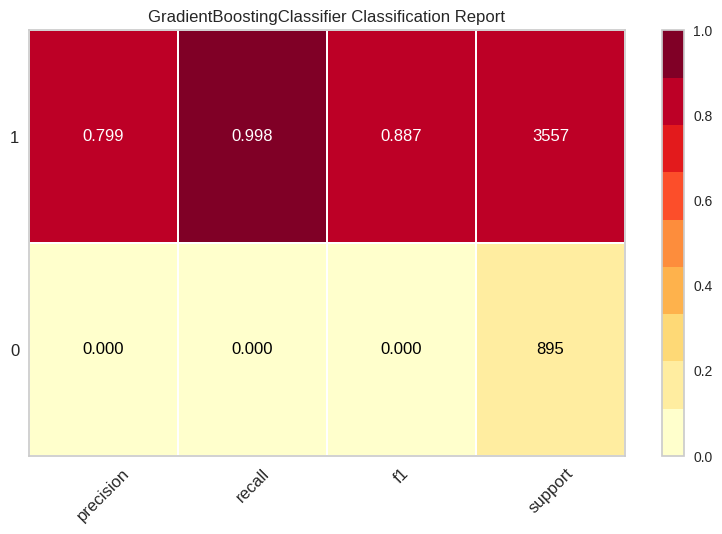




_________________________________________   calibration   ___________________________________________


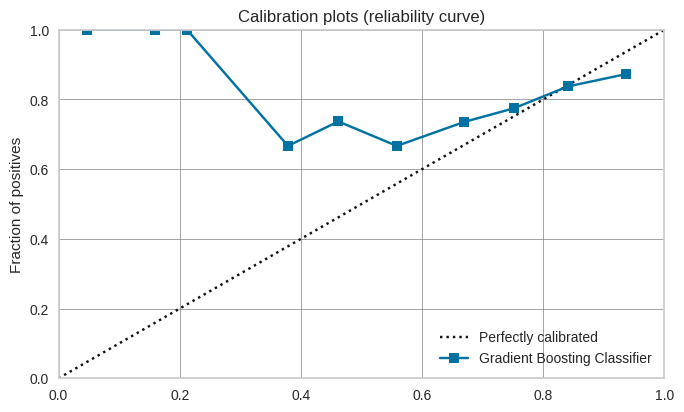




_________________________________________   feature   ___________________________________________


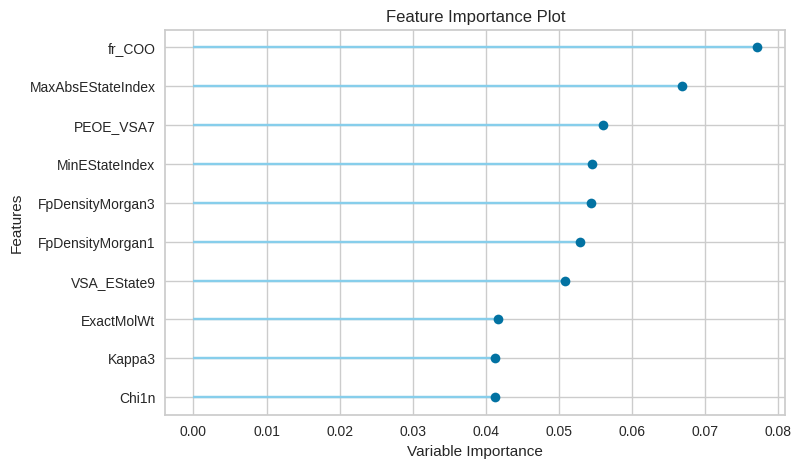




_________________________________________   feature_all   ___________________________________________


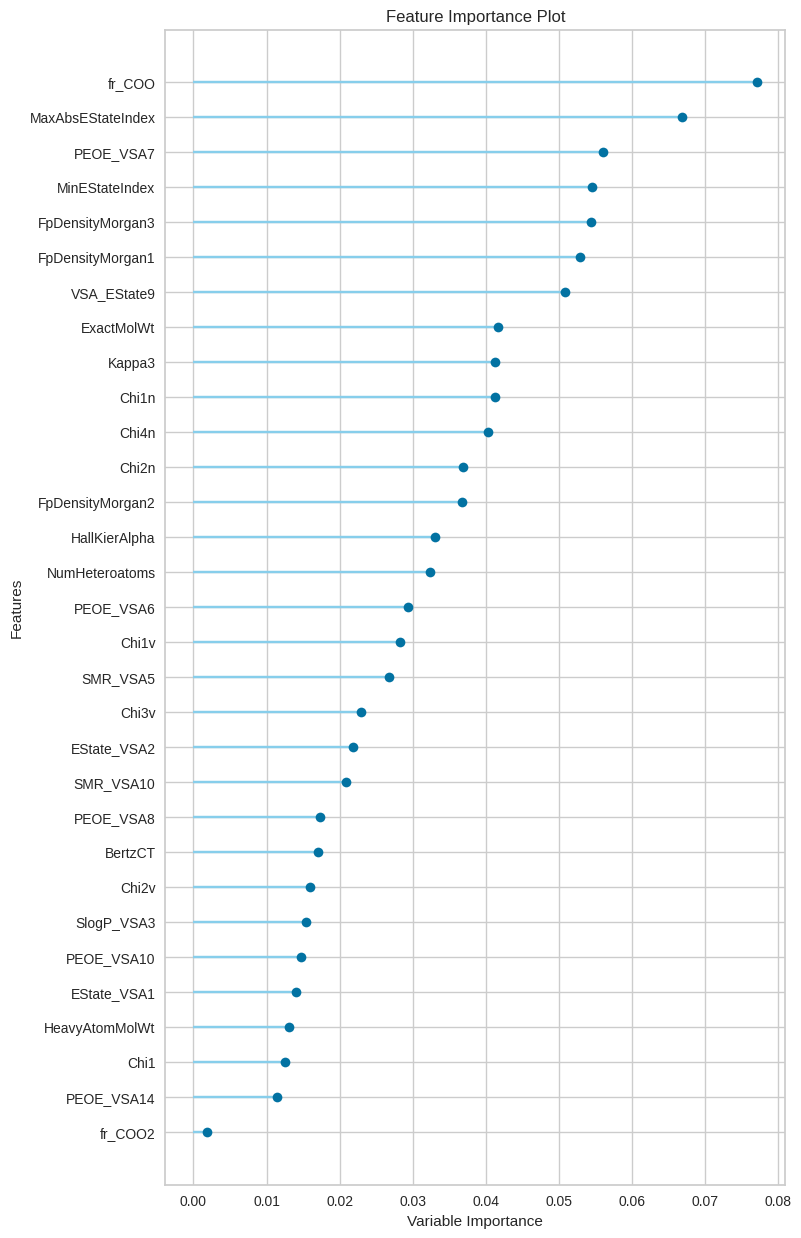




_________________________________________   parameter   ___________________________________________


,Parameters
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,log_loss
max_depth,3
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1





_________________________________________   lift   ___________________________________________


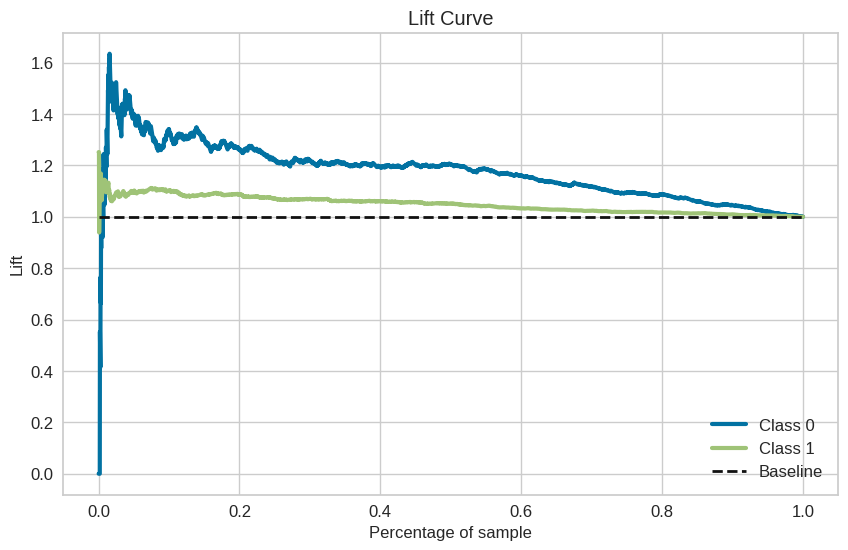




_________________________________________   gain   ___________________________________________


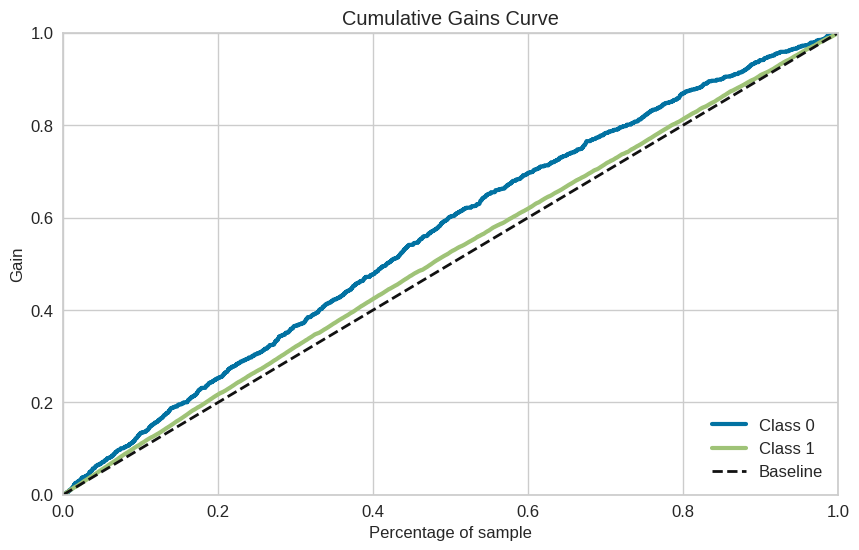

In [27]:
'''     

        Available plots in pycaret
        
        * 'pipeline' - Schematic drawing of the preprocessing pipeline
        * 'auc' - Area Under the Curve
        * 'threshold' - Discrimination Threshold
        * 'pr' - Precision Recall Curve
        * 'confusion_matrix' - Confusion Matrix
        * 'error' - Class Prediction Error
        * 'class_report' - Classification Report
        * 'boundary' - Decision Boundary
        * 'rfe' - Recursive Feature Selection
        * 'learning' - Learning Curve
        * 'manifold' - Manifold Learning
        * 'calibration' - Calibration Curve
        * 'vc' - Validation Curve
        * 'dimension' - Dimension Learning
        * 'feature' - Feature Importance
        * 'feature_all' - Feature Importance (All)
        * 'parameter' - Model Hyperparameter
        * 'lift' - Lift Curve
        * 'gain' - Gain Chart
        * 'tree' - Decision Tree
        * 'ks' - KS Statistic Plot
        
'''

available_plots = ['pipeline','auc','pr','confusion_matrix','error','class_report','calibration','feature','feature_all','parameter','lift','gain']
    
for i in available_plots:
    print('_________________________________________  ',i,'  ___________________________________________',sep=' ')
    plot_model(best_auc_models[0],plot=i)
    print('\n\n')


In [28]:
predictions.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,prediction_label,prediction_score
0,344.632385,7.283604,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458580,0.000000,...,0.00000,0.000000,26.809273,24.539801,4.794537,47.304081,1,1,1,0.7847
1,1432.410156,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,29.783175,...,98.32399,9.606882,0.000000,53.378235,0.000000,43.166668,0,0,1,0.8996
2,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969306,6.420822,...,0.00000,6.420822,11.752550,13.344559,9.589074,24.666666,1,1,1,0.7306
3,150.255707,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,0.000000,...,0.00000,0.000000,17.744066,32.290169,4.794537,26.778866,0,0,1,0.8306
4,1817.276367,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554970,47.360207,...,0.00000,37.098999,69.141350,38.704128,50.697491,102.583336,0,0,1,0.8136


**Adding EC2 column to our CSV File**

In [29]:
submission.head()

,id,EC1,EC2
0,14838,0,0.5
1,14839,1,0.5
2,14840,1,0.5
3,14841,1,0.5
4,14842,1,0.5


In [30]:
submission['EC2'] = predictions['prediction_label']
submission.to_csv(f'submission_pycaret.csv', index=False)

from IPython.display import FileLink
FileLink('submission_pycaret.csv')

#download csv by clicking on the link

/kaggle/working/submission_pycaret.csv

**Hence we have combined both colums for target EC1 and EC2**

In [31]:
submission.head()

,id,EC1,EC2
0,14838,0,1
1,14839,1,1
2,14840,1,1
3,14841,1,1
4,14842,1,1


**Visualizing the predicted values**

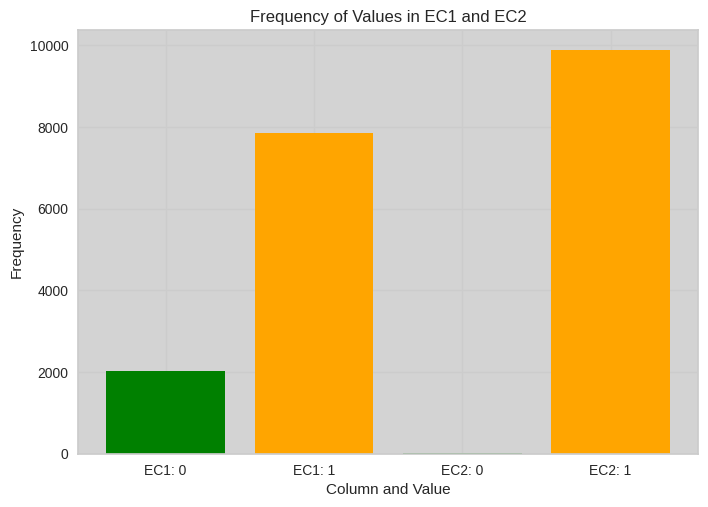

In [32]:
import matplotlib.pyplot as plt

# Get the value counts for each column

ec1_counts = submission['EC1'].value_counts()
ec2_counts = submission['EC2'].value_counts()

ec1_0 = ec1_counts[0] if 0 in ec1_counts else 0
ec1_1 = ec1_counts[1] if 1 in ec1_counts else 0
ec2_0 = ec2_counts[0] if 0 in ec2_counts else 0
ec2_1 = ec2_counts[1] if 1 in ec2_counts else 0

# Create the bar plot
fig, ax = plt.subplots()
ax.bar(['EC1: 0', 'EC1: 1', 'EC2: 0', 'EC2: 1'], [ec1_0, ec1_1, ec2_0, ec2_1],color=['green', 'orange', 'green', 'orange'])

# Set the title and labels
ax.set_title('Frequency of Values in EC1 and EC2')
ax.set_xlabel('Column and Value')
ax.set_ylabel('Frequency')


ax.set_facecolor('lightgray')
# Show the plot
plt.show()




# <div style="background-color:#fff1cc; padding: 120px;">I Thank you for viewing my work.If you like it, consider sharing it to others or give feedback to improve the notebook 😊.

 </div>

